# Image similarity classification

#### Import modules and settings

In [1]:
from modules.googlecloudstorage import GCS
import os, cv2, pathlib, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from IPython.display import clear_output as co
from time import time

# image similarity classification module
from modules.image_similarity import img, similarity_classifier, load_nested_images_from_folder

gcs = GCS('../../../../Apps/Python/bolsao-api/credentials/pluvia-360323-35cd376d5958.json')        

C:\Users\luisr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


---
### Download blob to folder

#### List blobs in blob

In [2]:
bucket_name = 'city-camera-images'
prefix = 'pics/313/'
delimiter = None

len([blob_name for blob_name in gcs.list_blobs(bucket_name, prefix, delimiter) if blob_name.endswith('.jpg')])

6760

#### Download all blobs in blob to folder

In [3]:
folder = '../../../../Dados/Downloads'
bucket_name = 'city-camera-images'
prefix = 'pics/313/'
delimiter = None

# gcs.download_to_folder(folder, bucket_name, prefix, delimiter)

---
## Load nested images from folder

In [13]:
n_samples = 1000  # n_samples=None to load all files in folder
folder = '../../../../Dados/Cameras/'
prefix = 'pics/313/'
path=f"{folder}/{prefix}"

frames = load_nested_images_from_folder(path, ext='.jpg', first=n_samples)

Done! Loaded total of 1000 images.


#### Set parameters and initialize model

In [14]:
thresh_hist = 0.6  # should be below 0.73
p_diff = 0.01  # should be between .02 and .15
baseimgs = ['Gabaritos/cam.jpg', 'Gabaritos/dark.jpg']

model = similarity_classifier(baseimgs, p=p_diff)

---
## Classify group of images using both methods

Note: Should take less than 2 minutes for 1000 images.

In [15]:
min_diff = pd.Series(model.min_diff(frames))  # diff decision metric
yhat_diff = pd.Series(model.predict_any(frames))  # diff prediction

hist_max_prct = pd.Series(model.histogram_max_prct(frames))  # histogram decision metric
yhat_hist = pd.Series(model.is_histogram_clustered(frames, threshold=thresh_hist))  # histogram prediction

#### Visualize images similarity metrics distributions

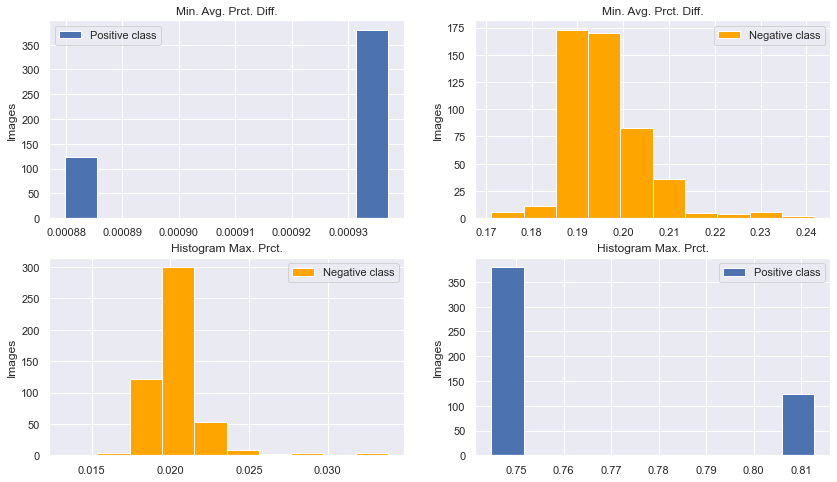

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs[0][0].hist(min_diff[yhat_diff])
axs[0][1].hist(min_diff[~yhat_diff], color='orange')
axs[1][0].hist(hist_max_prct[~yhat_hist], color='orange')
axs[1][1].hist(hist_max_prct[yhat_hist])

titles = ['Min. Avg. Prct. Diff.', 'Histogram Max. Prct.']

for i in [0, 1]:
    axs[i][i].legend(['Positive class'])
    for j in [0, 1]:
        axs[i][j].set(title=titles[i], ylabel='Images')
        if i != j:
            axs[i][j].legend(['Negative class'])

plt.show()

---
## Classify and check images one by one

In [17]:
i = -1

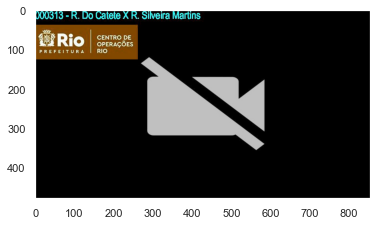


Average prct. diff. (decision: p=0.01):

['Gabaritos/cam.jpg', 'Gabaritos/dark.jpg']
[0.0008798592296663649, 0.1587869050170159]
[True, False]
Any: True

Histogram max. prct. (decision: threshold=0.6):

0.812726060369503
True


In [18]:
i += 1
print()
plt.imshow(frames[i]); plt.grid(False); plt.show()
print()
print(f'Average prct. diff. (decision: p={p_diff}):\n')
print(model.baseids)
print(model.diffs(frames[i]))
print(model.predict(frames[i]))
print('Any:', model.predict_any(frames[i]))
print()
print(f'Histogram max. prct. (decision: threshold={thresh_hist}):\n')
print(model.histogram_max_prct(frames[i]))
print(model.is_histogram_clustered(frames[i], threshold=thresh_hist))

---